In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/moviereviews.csv')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [3]:
df.isna().sum()

label      0
review    35
dtype: int64

In [15]:
df = df.dropna()
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [13]:
df = df[~df['review'].str.isspace()]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [18]:
df[df['review'].apply(lambda review:review =='')]

,label,review


In [19]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [40]:
# find top 20 word per label
neg_review = df[df['label']=='neg']['review']
pos_review = df[df['label']=='pos']['review']

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
# postive label top 20 words
count_vect = CountVectorizer(stop_words='english')
matrix_neg = count_vect.fit_transform(pos_review)

freq = zip(count_vect.get_feature_names(),matrix_neg.sum(axis=0).tolist()[0])
print(sorted(freq,key=lambda x : -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [42]:
matrix_neg = count_vect.fit_transform(neg_review)
# negative label top 20 words
freq = zip(count_vect.get_feature_names(),matrix_neg.sum(axis=0).tolist()[0])
print(sorted(freq,key=lambda x : -x[1])[:20])

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [43]:
# fit train
X = df['review']
y = df['label']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [50]:
pipe = Pipeline([
      ('tfidf',TfidfVectorizer()),
      ('svc',LinearSVC())
    ])

In [51]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [52]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [54]:
p = pipe.predict(X_test)
print(classification_report(y_test,p))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



C:\sofware\anaconda3\envs\projects\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


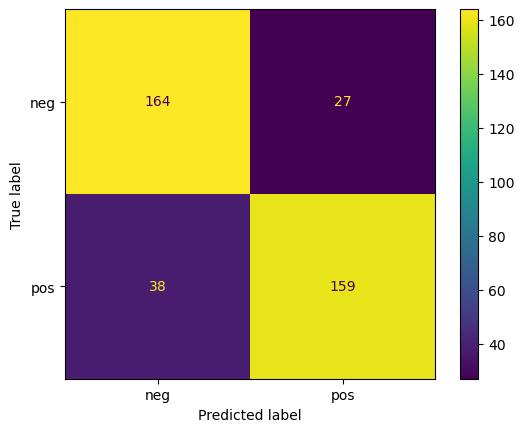

In [55]:
plot_confusion_matrix(pipe,X_test,y_test)